# Introduccion

Heeey finalmente estas en el paso final, espero que para este punto quedo claro cuan complicado puede el proceso que se necesita hacer para poder aprovechar los datos ya existentes almacenados en repositorios como GEO. 

Bueno ya para terminar solo queda procesar los datos crudos para atacar dos principales problemas:
- El error de lote
- Los valores faltantes
Para finalmente quedarte con los datos listos para usarse :smiley:

# Eliminar NANs

Como viste en el cuaderno de dataframes cuando un dato no se captura o no existe este se añade como un NAN, lo que es problematico si quieres usar tu set de datos para analisis estadisticos o similares. Por lo mismo existen dos alternativas para tratar este problema: La imputacion y la eliminacion de los NAN. La imputacion consiste en "inferir" el dato faltante a partir de la distribucion del resto, pero eso es de cuidado, entonces para evitar inventar datos falso muchos obtan solo con quitar aquellos faltantes

In [ ]:

# Lo cual es facil no? Solo es correr dropnan, intentalo
import pandas as pd 
matriz = pd.read_csv("matriz.tsv",sep="\t",index_col=0)
matriz.dropnan()


# Actividad sorpresa :fire: :horse: :fire:
Como los NAN estan en todos lados es necesario una estategia un poco mas compleja para resolverlos. He aqui viene una actividad sorpresa :sauropod:.

La limpieza de los dataframes lo haras tu en base al siguiente algoritmo:
- Buscaras la columna o fila con el mayor numero de NAN y la eliminaras
- En caso de que una columna y fila tenga el mismo numero de NAN, elimines la que reducen de mayor manera el procentaje de NAN en todo el dataframe
- Repite el procesos hasta que no queden NAN en el dataframe


# Procesamiento de los datos

Como recordaras de lo que les he platicado aun si extraemos los datos crudos, estos aun no estan listos para ser utilizados, debido a que estos mismos pueden contener cierto grado de varibilidad tecnicas, es decir que las pequeñas variaciones en la forma y condicion en que se realizaron cada experimento generaron pequeñas variaciones en los datos que no son biologicamente relevantes. Por esto mismo es necesario corregir ese error de lote para el mejor aprovechamiento de los datos. 

Para esto existen distintas estrategias entre las cuales esta *combat*, una algoritmo que consiste de tres principales pasos:
- La estandarizacion de los datos por columnas
- La inferencia del ruido tecnico (aditivo y multiplicativo) a partir de teoria de bayes 
- La correccion del ruido en los datos reales

Este algoritmo por su eficacia y accesibilidad de uso a partir del uso de la libreria `inmoose` es el que se utiliza para la correccion del batch effect. Este algoritmo ademas se ha visto que tienen un mejor desempeño cuando se realiza en conjunto con el algoritmo de normalizacion por qüantiles.

In [22]:
batch_1 = np.random.normal(2,4,(1000,1000))
batch_1.shape

(1000, 1000)

In [23]:
# Para eso simplemente tienes que correr esta funcion por batch 
import qnorm
import numpy as np

batch_1 = np.random.normal(2,4,(1000,1000))
batch_2 = np.random.normal(4,7,(1000,1000))

q1 = qnorm.quantile_normalize(batch_1)
q2 = qnorm.quantile_normalize(batch_2)

batch_full = np.concatenate((batch_1,batch_2),axis=1)
q_full = np.concatenate((q1,q2),axis=1)


In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x = pca.fit_transform(batch_full)

pca = PCA(n_components=2)
y = pca.fit_transform(q_full)

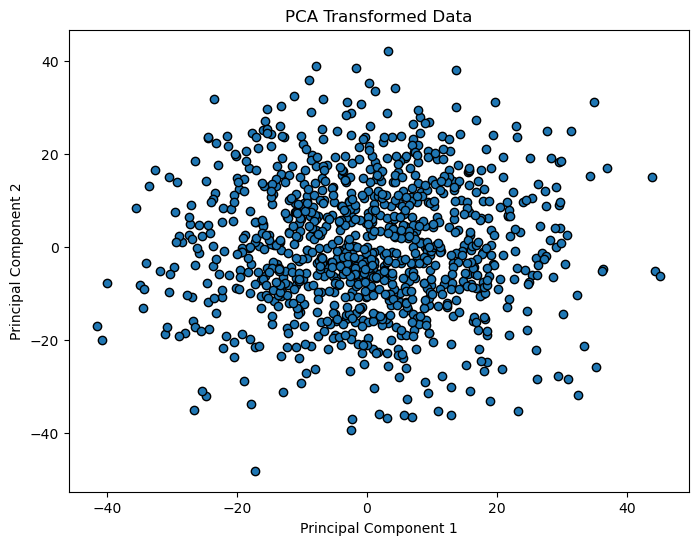

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x[:, 0], x[:, 1], cmap='coolwarm', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Transformed Data")

plt.show()

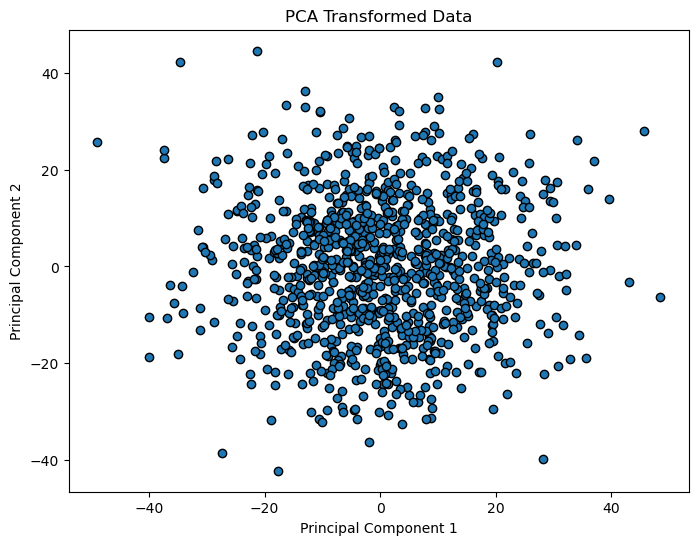

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(y[:, 0], y[:, 1], cmap='coolwarm', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Transformed Data")

plt.show()

In [29]:
# Y ya solo le pasas tus batchs a inmoose para hacer la correccion 
# Para este ejercicio ocupa el kernel muDAS 
from inmoose.pycombat import pycombat_norm
# Debes pasar una lista con el batch al que pertenece cada columna 
batch_list = [0 if i <= 9 else 1 for i in range(2000)]

# Y listo tus datos libres de batch effect
combat_process = pycombat_norm(q_full,batch_list)



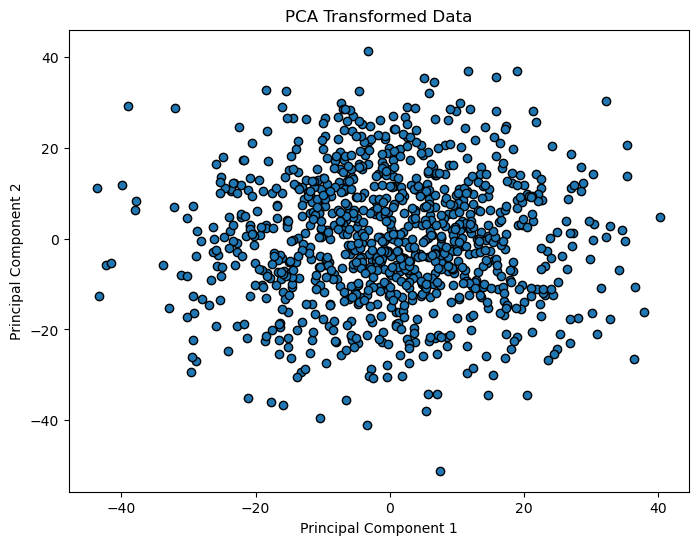

In [32]:
pca = PCA(n_components=2)
z = pca.fit_transform(np.asarray(combat_process))
plt.figure(figsize=(8,6))
plt.scatter(z[:, 0], z[:, 1], cmap='coolwarm', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Transformed Data")

plt.show()

# Actividad final :horse: :fire: :fire: :fire: :fire: :fire: 

Finalmente como ultima actividad te voy a pedir que realises dos cosas:

- Elije los GSMs de dos GSEs con condiciones expermientales similares (para eso tendras que revisarlo manualmente en GEO), puedes antes revisar los metadatos para darte una idea. Para esos GSMS realiza la normalizacion por quantiles definiendo como batch cada GSE y despues usa combat para corregir el error. Asegurate de graficar el antes y despues. Si en tus datos niguno de los GSE cumple los requisitos puedes saltarte esto :3

- Para que tengas mejor entendido porque hacemos la normalizacion de quiantiles por favor lee y explicame (es a tu consideracion si lo quieres presentar) el siguiente articulo: https://pmc.ncbi.nlm.nih.gov/articles/PMC4896498/